<a href="https://colab.research.google.com/github/AlexanderSutherland/CS7643_Project/blob/main/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM-CNN Project

**Add Necessary Imports**

In [1]:
'''
Add Necessary Imports:
'''
# Pytorch (Deep Learning Model Libraries)
import torch
import torch.nn as nn
import torch.optim as optim

# Datetime class used for indexing dates
import datetime as dt


# Local Libraries
from plotter import plot_price_predictions
from train_model import train_model, test_model
from lstm import LSTM
from data_util import DataUtil

**Set Device (CUDA or CPU)**

In [2]:
# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using device: %s" % device)

You are using device: cuda


**Predict Price based on SMH ETF Closing Price**

Epoch 1/200, Loss: 0.2861508268576402
Test Loss: 0.15362786641344428
Epoch 2/200, Loss: 0.1590906152358422
Test Loss: 0.05050565116107464
Epoch 3/200, Loss: 0.056151168850752026
Test Loss: 0.03167389053851366
Epoch 4/200, Loss: 0.045919451862573624
Test Loss: 0.01822056877426803
Epoch 5/200, Loss: 0.020692225115803573
Test Loss: 0.01084622333291918
Epoch 6/200, Loss: 0.010808571886557799
Test Loss: 0.011202026507817209
Epoch 7/200, Loss: 0.008407852719896115
Test Loss: 0.009261727100238204
Epoch 8/200, Loss: 0.007580382749438286
Test Loss: 0.008756612660363317
Epoch 9/200, Loss: 0.009601925105716173
Test Loss: 0.009908517706207931
Epoch 10/200, Loss: 0.009791769105224656
Test Loss: 0.008166689076460898
Epoch 11/200, Loss: 0.007215534838346334
Test Loss: 0.00848017493262887
Epoch 12/200, Loss: 0.006941564613953233
Test Loss: 0.008404634427279234
Epoch 13/200, Loss: 0.006661533772085722
Test Loss: 0.009705490432679653
Epoch 14/200, Loss: 0.007463073178839225
Test Loss: 0.0098563057836145

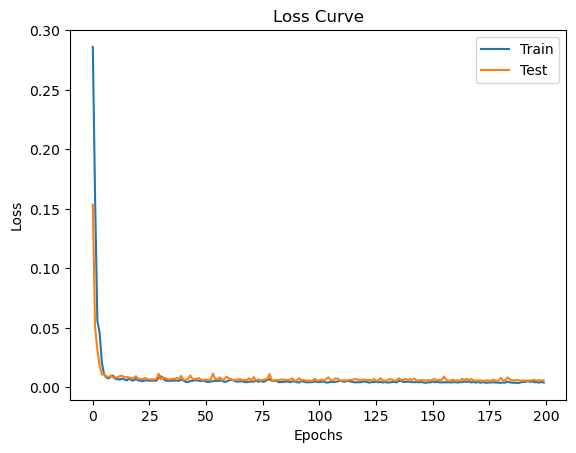

Test Loss: 0.006033944897353649


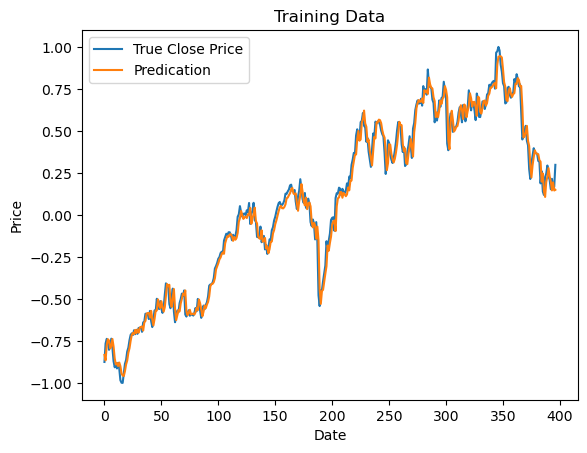

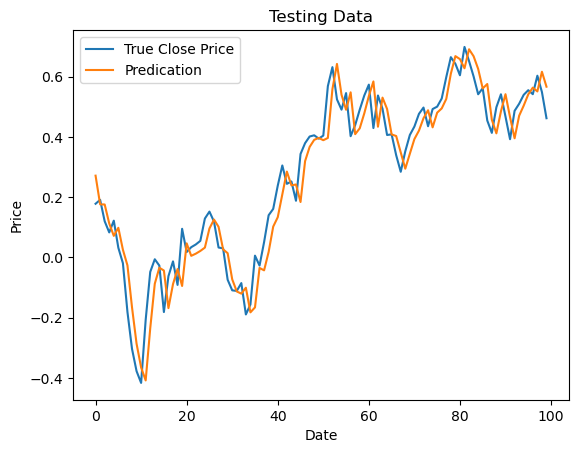

In [3]:

def main_close_price(device = device, start_date = dt.datetime(2014, 1, 1), end_date = dt.datetime(2015, 12, 31), look_back = 7):
    """
    Main function to train and test a model for predicting close prices.

    Args:
        TBD (optional): Placeholder for potential future arguments.

    Returns:
        None
    """
    
    # Hyperparameters
    batch_size = 32
    learning_rate = 0.01
    criterion = nn.MSELoss()
    optimizer_type = optim.Adam
    epochs = 200
    look_back = 7
    
    # Date Range
    start_date = dt.datetime(2014, 1, 1)
    end_date = dt.datetime(2015, 12, 31)
        
    # Split ratio for Train and Test
    split_ratio = 0.8
    
    # Generate the data sets for training and testing (Called loaders)
    data_util = DataUtil(start_date,end_date)
    train_loader, test_loader, x_train, y_train, x_test, y_test = data_util.generate_data_loaders_close_price(batch_size=batch_size,
                                                                split_ratio=split_ratio,
                                                                look_back=7,
                                                                device=device)
    
    # Create LSTM model
    model = LSTM(1, look_back, 4).to(device)

    
    # Train the model
    model = train_model(train_loader,
                        test_loader,
                        model=model,
                        criterion=criterion,
                        optimizer_type=optimizer_type,
                        epochs=epochs,
                        learning_rate=learning_rate,
                        load_model=None,
                        device=device)
    
    # Test model
    test_model(test_loader, model, criterion, device) 
    
    # Plot Price Predictions:
    model = model.to('cpu')
    pred_train = model(x_train).detach().numpy()
    pred_test = model(x_test).detach().numpy()
    plot_price_predictions(pred_train,y_train,pred_test,y_test)
    
    # Save model updates
    save_model = input('Would you like to save the model? Type "YES" to confirm: ')
    if save_model.upper() == 'YES':
        torch.save(model.state_dict(), 'model_closing_price.pth')
    
    #print(x_train.shape,y_train.shape, x_test.shape, y_test.shape )

main_close_price()

**Predict Price based on SMH ETF Daily Return**

Epoch 1/200, Loss: 0.23670482979370996
Test Loss: 0.06593735748901963
Epoch 2/200, Loss: 0.07608433182422931
Test Loss: 0.058480931795202196
Epoch 3/200, Loss: 0.053955916315317154
Test Loss: 0.025564743671566248
Epoch 4/200, Loss: 0.029522044727435477
Test Loss: 0.023819502908736467
Epoch 5/200, Loss: 0.011928594169708399
Test Loss: 0.007793065102305263
Epoch 6/200, Loss: 0.008518310836874522
Test Loss: 0.008319802465848625
Epoch 7/200, Loss: 0.009724547423852177
Test Loss: 0.007891981513239443
Epoch 8/200, Loss: 0.009367009750209175
Test Loss: 0.007580410805530846
Epoch 9/200, Loss: 0.006267065218148323
Test Loss: 0.007546053268015385
Epoch 10/200, Loss: 0.006905416134171761
Test Loss: 0.011711416533216834
Epoch 11/200, Loss: 0.009047822382014532
Test Loss: 0.011135239619761705
Epoch 12/200, Loss: 0.007232586172624276
Test Loss: 0.007244285778142512
Epoch 13/200, Loss: 0.005853634506750565
Test Loss: 0.008939059101976454
Epoch 14/200, Loss: 0.00685558280047889
Test Loss: 0.0070876482

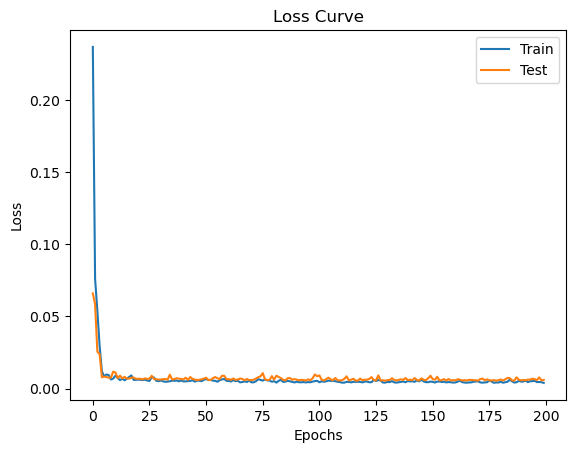

Test Loss: 0.005969056684989482


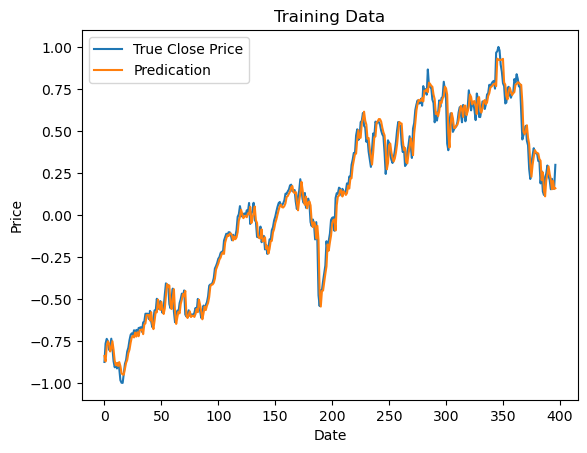

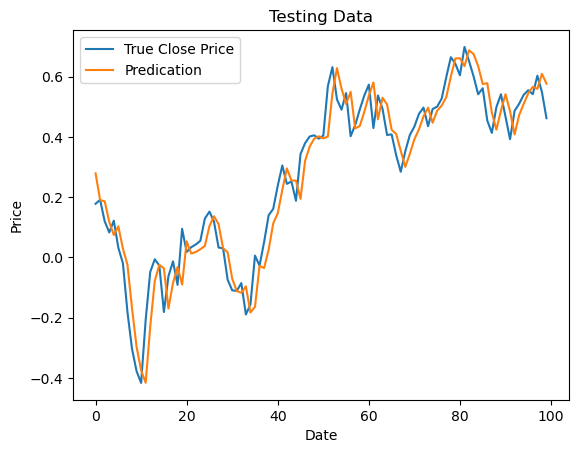

In [4]:

def main_close_price(device = device, start_date = dt.datetime(2014, 1, 1), end_date = dt.datetime(2015, 12, 31), look_back = 7):
    """
    Main function to train and test a model for predicting close prices.

    Args:
        TBD (optional): Placeholder for potential future arguments.

    Returns:
        None
    """
    
    # Hyperparameters
    batch_size = 32
    learning_rate = 0.01
    criterion = nn.MSELoss()
    optimizer_type = optim.Adam
    epochs = 200
    look_back = 7
    
    # Date Range
    start_date = dt.datetime(2014, 1, 1)
    end_date = dt.datetime(2015, 12, 31)
        
    # Split ratio for Train and Test
    split_ratio = 0.8
    
    # Generate the data sets for training and testing (Called loaders)
    data_util = DataUtil(start_date,end_date)
    train_loader, test_loader, x_train, y_train, x_test, y_test = data_util.generate_data_loaders_close_price(batch_size=batch_size,
                                                                split_ratio=split_ratio,
                                                                look_back=7,
                                                                device=device)
    
    # Create LSTM model
    model = LSTM(1, look_back, 4).to(device)

    
    # Train the model
    model = train_model(train_loader,
                        test_loader,
                        model=model,
                        criterion=criterion,
                        optimizer_type=optimizer_type,
                        epochs=epochs,
                        learning_rate=learning_rate,
                        load_model=None,
                        device=device)
    
    # Test model
    test_model(test_loader, model, criterion, device) 
    
    # Plot Price Predictions:
    model = model.to('cpu')
    pred_train = model(x_train).detach().numpy()
    pred_test = model(x_test).detach().numpy()
    plot_price_predictions(pred_train,y_train,pred_test,y_test)
    
    # Save model updates
    save_model = input('Would you like to save the model? Type "YES" to confirm: ')
    if save_model.upper() == 'YES':
        torch.save(model.state_dict(), 'model_daily_returns.pth')
    
    #print(x_train.shape,y_train.shape, x_test.shape, y_test.shape )

main_close_price()